In [1]:
import pandas as pd
import geopandas as gpd
import cbsodata

# Find out which columns are available
# 37201	    , LevendGeborenKinderenRelatief_2
# 3747	    , MannenEnVrouwen_4
# 37201 	, JongerDan20Jaar_9
# 37201	    , k_40Tot45Jaar_14 & k_45JaarOfOuder_15
# 71487NED	, TotaalHuishoudensMetKinderen_1
# 85701NED	, A025294 & A025297
# 85701NED	, A025294
# 37259NED	, BevolkingOp1Januari_1
# 37259NED	, Bevolkingsdichtheid_2
# 85826NED	, WerkzameBeroepsbevolking_3
# 85826NED	, Beroepsbevolking_2
# 85826NED	, WerklozeBeroepsbevolking_12
metadata = pd.DataFrame(cbsodata.get_meta('85826NED', 'TypedDataSet'))


In [2]:
metadata = metadata[['RegioS','Perioden','WerklozeBeroepsbevolking_12']]

In [3]:
metadata

,RegioS,Perioden,WerklozeBeroepsbevolking_12
0,NL01,2013JJ00,754.0
1,NL01,2014JJ00,762.0
2,NL01,2015JJ00,724.0
3,NL01,2016JJ00,646.0
4,NL01,2017JJ00,546.0
...,...,...,...
47845,AM99,2019JJ00,NaN
47846,AM99,2020JJ00,NaN
47847,AM99,2021JJ00,NaN
47848,AM99,2022JJ00,NaN


In [20]:
data = metadata[metadata['Perioden'] == '2020JJ00']

data

,RegioS,Perioden,WerklozeBeroepsbevolking_12
7,NL01,2020JJ00,465.0
18,LD01,2020JJ00,47.0
29,LD02,2020JJ00,92.0
40,LD03,2020JJ00,232.0
51,LD04,2020JJ00,94.0
...,...,...,...
47802,AM35,2020JJ00,0.0
47813,AM36,2020JJ00,0.0
47824,AM37,2020JJ00,0.0
47835,AM38,2020JJ00,0.0


In [18]:
municipal_boundaries = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:gemeente_gegeneraliseerd', engine="pyogrio")

municipal_boundaries['rubriek'].unique()

municipal_boundaries

,id,statcode,jrstatcode,statnaam,rubriek,geometry
0,1,GM0014,2021GM0014,Groningen,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344...."
1,2,GM0034,2021GM0034,Almere,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422...."
2,3,GM0037,2021GM0037,Stadskanaal,gemeente,"MULTIPOLYGON (((263763.866 566430.392, 263988...."
3,4,GM0047,2021GM0047,Veendam,gemeente,"MULTIPOLYGON (((256231.909 572319.213, 258595...."
4,5,GM0050,2021GM0050,Zeewolde,gemeente,"MULTIPOLYGON (((170596.293 486786.456, 170560...."
...,...,...,...,...,...,...
347,348,GM1966,2021GM1966,Het Hogeland,gemeente,"MULTIPOLYGON (((215071.742 595253.084, 215169...."
348,349,GM1969,2021GM1969,Westerkwartier,gemeente,"MULTIPOLYGON (((217623.770 592502.490, 217917...."
349,350,GM1970,2021GM1970,Noardeast-Fryslân,gemeente,"MULTIPOLYGON (((207686.537 595425.623, 207640...."
350,351,GM1978,2021GM1978,Molenlanden,gemeente,"MULTIPOLYGON (((123712.581 439998.364, 124188...."


Text(0.5, 1.0, 'Quantiles, 2020')

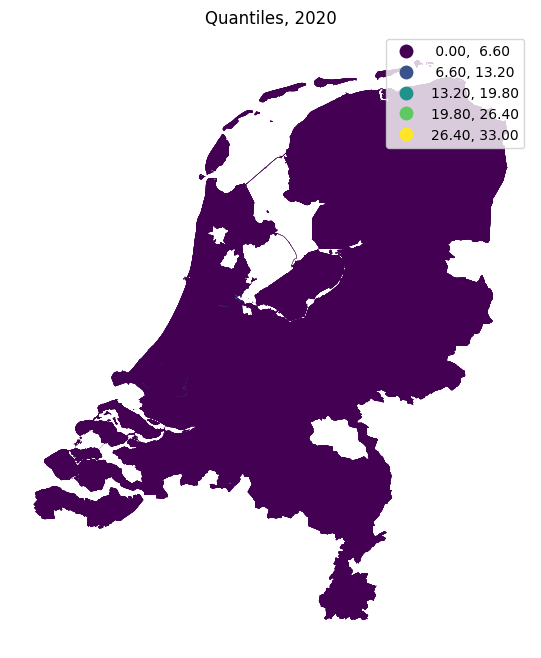

In [6]:

# Link data from Statistics Netherlands to geodata
municipal_boundaries = pd.merge(municipal_boundaries, data,
                               left_on = "statcode", 
                               right_on = "RegioS")
# Create a thematic map
# schemes:
# Natural_Breaks, Equal_Interval, Quantiles, Standard_Deviation
#
# boxplot, equalinterval, fisherjenks, fisherjenkssampled, headtailbreaks, jenkscaspall, 
# jenkscaspallforced, jenkscaspallsampled, maxp, maximumbreaks, naturalbreaks, quantiles, 
# percentiles, prettybreaks, stdmean, userdefined
#
# K = number of classes (if no scheme, default on 5)
p = municipal_boundaries.plot(column='WerklozeBeroepsbevolking_12',
                             scheme="Equal_Interval",
                             k=5,
                             legend = True, 
                             figsize = (10,8))
p.axis('off')
p.set_title('Quantiles, 2020')


In [9]:
#mc.FisherJenks?